## Preparing Data for Training

In [1]:
import pandas as pd
import numpy as np

In [2]:
airbnb = pd.read_csv('cleaned_airbnb.csv')

In [3]:
target = 'price'

one_hot_encode_features = ['room_type', 'city', 'state', 'guests_included']

price_features = ['security_deposit', 'extra_people'] 

text_cols = ['space', 'description']

other_features = ['minimum_nights', 'maximum_nights', 'review_scores_rating']

features = one_hot_encode_features + price_features + text_cols + other_features

In [4]:
airbnb['room_type'].value_counts()

Entire home/apt    92795
Private room       37731
Shared room         2102
Hotel room           957
Name: room_type, dtype: int64

In [5]:
airbnb['guests_included'].value_counts()

1     73567
2     30796
4     12752
6      5672
3      4135
8      2132
5      2057
10      989
7       551
12      347
16      194
9       148
14       84
11       55
15       45
13       31
20        8
24        5
18        4
19        2
21        2
28        2
35        1
17        1
22        1
29        1
30        1
32        1
36        1
Name: guests_included, dtype: int64

In [6]:
airbnb['review_scores_rating'].value_counts()

100.0    36412
98.0     15098
99.0     13710
97.0     12053
96.0     10147
95.0      8375
93.0      6337
94.0      5668
90.0      4385
92.0      3617
80.0      3069
91.0      2872
89.0      1813
87.0      1711
88.0      1670
85.0       901
86.0       795
60.0       771
84.0       740
83.0       607
82.0       327
70.0       321
73.0       306
20.0       268
75.0       198
40.0       177
81.0       161
78.0       160
76.0       138
77.0       133
67.0       104
79.0        92
50.0        78
74.0        56
72.0        50
71.0        45
65.0        42
68.0        38
69.0        27
64.0        17
53.0        17
63.0        15
66.0        14
30.0        13
47.0         8
62.0         6
56.0         5
57.0         4
58.0         3
61.0         2
55.0         2
45.0         2
43.0         1
59.0         1
33.0         1
48.0         1
52.0         1
Name: review_scores_rating, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

from category_encoders.one_hot import OneHotEncoder
from category_encoders.ordinal import OrdinalEncoder

from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
X = airbnb.drop(['price'], axis=1)
y = airbnb.drop(features, axis=1)

X.shape, y.shape

((133585, 11), (133585, 1))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.head(3)

,space,description,city,state,room_type,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating
4128,Everyone talks about Williamsburg as if Bedfor...,"Modern, vibrantly painted 1B with large backya...",BROOKLYN,NY,Entire home/apt,250.0,1,0.0,2,1125,100.0
122022,This is a cbd retail store during the day and ...,"Our 1,000 sq ft storefront is the most conveni...",NEW YORK,NY,Entire home/apt,0.0,1,0.0,1,2,100.0
113213,Newly renovated downstairs studio apartment. ...,This newly remodeled studio apartment is in a ...,NASHVILLE,TN,Entire home/apt,300.0,2,55.0,28,1125,99.0


In [12]:
# onehot encode
onehot = OneHotEncoder([])
ordinal = OrdinalEncoder()

# one hot encode train
transformed_train = onehot.fit_transform(X_train[['state', 'room_type']])
X_train.loc[:, 'city'] = ordinal.fit_transform(X_train['city'])

# one hot encode test
transformed_test = onehot.transform(X_test[['state', 'room_type']])
X_test.loc[:, 'city'] = ordinal.transform(X_test['city'])

In [13]:
X_train = pd.concat([X_train, transformed_train], axis=1)

In [14]:
X_test = pd.concat([X_test, transformed_test], axis=1)

In [15]:
X_train.head(2)

,space,description,city,state,room_type,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,...,state_11,state_12,state_13,state_14,state_15,state_16,room_type_1,room_type_2,room_type_3,room_type_4
4128,Everyone talks about Williamsburg as if Bedfor...,"Modern, vibrantly painted 1B with large backya...",1,NY,Entire home/apt,250.0,1,0.0,2,1125,...,0,0,0,0,0,0,1,0,0,0
122022,This is a cbd retail store during the day and ...,"Our 1,000 sq ft storefront is the most conveni...",2,NY,Entire home/apt,0.0,1,0.0,1,2,...,0,0,0,0,0,0,1,0,0,0


In [16]:
X_train.drop(columns=['state', 'room_type'], axis=1, inplace=True)
X_test.drop(columns=['state', 'room_type'], axis=1, inplace=True)

In [17]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((106868, 29), (106868, 1), (26717, 29), (26717, 1))

In [18]:
X_train.columns

Index(['space', 'description', 'city', 'security_deposit', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights',
       'review_scores_rating', 'state_1', 'state_2', 'state_3', 'state_4',
       'state_5', 'state_6', 'state_7', 'state_8', 'state_9', 'state_10',
       'state_11', 'state_12', 'state_13', 'state_14', 'state_15', 'state_16',
       'room_type_1', 'room_type_2', 'room_type_3', 'room_type_4'],
      dtype='object')

In [19]:
import spacy
from spacy.tokenizer import Tokenizer
import en_core_web_lg

#nlp = spacy.load("en_core_web_lg") # error occurs - problem is related to the way spaCy detects installed packages
nlp = en_core_web_lg.load()


# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

# stop words
stop_words = nlp.Defaults.stop_words.union(['厨房', '  ', ' ', '®', '~', '●', '★', '★ ★', '☆', '♦', '✅', '✓', '✔', '❤', '⭐', '|', 
                                            '+', '\t', '+ +', '-a', '$', '-1', '-2', '-', 'yo'])

In [20]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.text.lower() not in stop_words) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_.lower())
    
    return lemmas

In [19]:
from tqdm import tqdm 
tqdm.pandas()

c:\users\tigju\anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [54]:
X_train.loc[:, 'space_tokens'] = X_train['space'].progress_apply(get_lemmas)

100%|████████████████████████████████████████████████████████████████████████| 106868/106868 [1:10:07<00:00, 25.40it/s]


In [55]:
X_train.loc[:, 'description_tokens'] = X_train['description'].progress_apply(get_lemmas)

100%|████████████████████████████████████████████████████████████████████████| 106868/106868 [1:29:21<00:00, 19.93it/s]


In [56]:
X_test.loc[:, 'space_tokens'] = X_test['space'].progress_apply(get_lemmas)

100%|████████████████████████████████████████████████████████████████████████████| 26717/26717 [06:58<00:00, 63.86it/s]


In [57]:
X_test.loc[:, 'description_tokens'] = X_test['description'].progress_apply(get_lemmas)

100%|████████████████████████████████████████████████████████████████████████████| 26717/26717 [10:32<00:00, 42.22it/s]


In [21]:
space_lemmas_train = pd.read_csv('space_lemmas_train.csv', index_col=0)
desc_lemmas_train = pd.read_csv('desc_lemmas_train.csv', index_col=0)
space_lemmas_test = pd.read_csv('space_lemmas_test.csv', index_col=0)
desc_lemmas_test = pd.read_csv('desc_lemmas_test.csv', index_col=0)

In [22]:
space_lemmas_train.shape, desc_lemmas_train.shape, space_lemmas_test.shape, desc_lemmas_test.shape

((106868, 1), (106868, 1), (26717, 1), (26717, 1))

In [23]:
desc_lemmas_train.head()

,desc_tokens
0,"['modern', 'vibrantly', 'paint', '1b', 'large'..."
1,"['1,000', 'sq', 'ft', 'storefront', 'convenien..."
2,"['newly', 'remodel', 'studio', 'apartment', 'q..."
3,"['enjoy', 'weekend', 'cozy', 'studio', 'apartm..."
4,"['metro', 'style', 'live', 'washington', 'dc',..."


In [24]:
# Instantiate vectorizer object

tfidf = TfidfVectorizer(
#     min_df=2,
    ngram_range=(1,2),
    max_features=5000,
    strip_accents="unicode",
    norm='l2',
    preprocessor=' '.join,
    stop_words='english'
    )

In [25]:
token_list = space_lemmas_train['space_tokens'].to_list()
token_list2 = desc_lemmas_train['desc_tokens'].to_list()
token_list3 = space_lemmas_test['space_tokens'].to_list()
token_list4 = desc_lemmas_test['desc_tokens'].to_list()

In [26]:
pre_docs = [d.strip('][').replace("'", "").split(', ') for d in token_list]
pre_docs2 = [d.strip('][').replace("'", "").split(', ') for d in token_list2]
pre_docs3 = [d.strip('][').replace("'", "").split(', ') for d in token_list3]
pre_docs4 = [d.strip('][').replace("'", "").split(', ') for d in token_list4]

In [27]:
type(pre_docs[9])

list

In [28]:
# TEST tfidf
tokenized_sentences = [['this', 'is', 'one', 'cat', 'or', 'dog'],
                       ['this', 'is', 'another', 'dog']]

tfidf.fit_transform(tokenized_sentences)

<2x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [29]:
# test tfidf
tfidf.get_feature_names()

['cat', 'cat dog', 'dog']

In [30]:
# Create a vocabulary and get word counts per document on train data columns ['space', 'description']

dtm1 = tfidf.fit_transform(pre_docs)
dtm2 = tfidf.fit_transform(pre_docs2)

In [31]:
dtm1

<106868x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 5717191 stored elements in Compressed Sparse Row format>

In [32]:
dtm2

<106868x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 9405774 stored elements in Compressed Sparse Row format>

In [33]:
# Create a vocabulary and get word counts per document on test data columns ['space', 'description']

dtm3 = tfidf.transform(pre_docs3)
dtm4 = tfidf.transform(pre_docs4)

In [34]:
# Print word counts

dtm1_df = pd.DataFrame(dtm1.todense(), columns=tfidf.get_feature_names())
print('Shape: ', dtm1_df.shape)
dtm1_df.head(2)

Shape:  (106868, 5000)


,00,00 pm,000,000 space,10,10 15,10 mile,10 min,10 minute,100,...,youtube,zen,zero,zeus,zeus focus,zeus property,zilker,zilker park,zone,zoo
0,0.0,0.0,0.237371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Print word counts
# Get feature names to use as dataframe column headers

dtm2_df = pd.DataFrame(dtm2.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
print('Shape: ', dtm2_df.shape)
dtm2_df.head()

Shape:  (106868, 5000)


,00,00 pm,000,000 space,10,10 15,10 mile,10 min,10 minute,100,...,youtube,zen,zero,zeus,zeus focus,zeus property,zilker,zilker park,zone,zoo
0,0.0,0.0,0.239107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.124415,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# test data 
dtm3_df = pd.DataFrame(dtm3.todense(), columns=tfidf.get_feature_names())
dtm4_df = pd.DataFrame(dtm4.todense(), columns=tfidf.get_feature_names())

dtm3_df.shape, dtm4_df.shape

((26717, 5000), (26717, 5000))

In [37]:
X_train.head(1)

,space,description,city,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,state_1,...,state_11,state_12,state_13,state_14,state_15,state_16,room_type_1,room_type_2,room_type_3,room_type_4
4128,Everyone talks about Williamsburg as if Bedfor...,"Modern, vibrantly painted 1B with large backya...",1,250.0,1,0.0,2,1125,100.0,1,...,0,0,0,0,0,0,1,0,0,0


In [38]:
X_train_copy = X_train.drop(columns=['space', 'description'], axis=1)
X_test_copy = X_test.drop(columns=['space', 'description'], axis=1)

In [39]:
X_train_copy.head()

,city,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,state_1,state_2,state_3,...,state_11,state_12,state_13,state_14,state_15,state_16,room_type_1,room_type_2,room_type_3,room_type_4
4128,1,250.0,1,0.0,2,1125,100.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
122022,2,0.0,1,0.0,1,2,100.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
113213,3,300.0,2,55.0,28,1125,99.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
26550,1,0.0,1,0.0,2,4,93.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
91062,4,0.0,1,0.0,5,365,90.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## Train Model

In [40]:
import numpy as np
import os
import datetime
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [41]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [42]:
X_train_copy.shape, X_test_copy.shape

((106868, 27), (26717, 27))

In [43]:
X_train_copy.head()

,city,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,state_1,state_2,state_3,...,state_11,state_12,state_13,state_14,state_15,state_16,room_type_1,room_type_2,room_type_3,room_type_4
4128,1,250.0,1,0.0,2,1125,100.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
122022,2,0.0,1,0.0,1,2,100.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
113213,3,300.0,2,55.0,28,1125,99.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
26550,1,0.0,1,0.0,2,4,93.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
91062,4,0.0,1,0.0,5,365,90.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [44]:
# reset index for conctenation with dtm matrices

X_train_new = X_train_copy.reset_index()
X_train_new.drop(columns=['index'], inplace=True)
X_train_new.head()

,city,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,state_1,state_2,state_3,...,state_11,state_12,state_13,state_14,state_15,state_16,room_type_1,room_type_2,room_type_3,room_type_4
0,1,250.0,1,0.0,2,1125,100.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,0.0,1,0.0,1,2,100.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,300.0,2,55.0,28,1125,99.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0.0,1,0.0,2,4,93.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0.0,1,0.0,5,365,90.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [45]:
# reset index for conctenation with dtm matrices

X_test_new = X_test_copy.reset_index()
X_test_new.drop(columns=['index'], inplace=True)
X_train_new.head()

,city,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,state_1,state_2,state_3,...,state_11,state_12,state_13,state_14,state_15,state_16,room_type_1,room_type_2,room_type_3,room_type_4
0,1,250.0,1,0.0,2,1125,100.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2,0.0,1,0.0,1,2,100.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,300.0,2,55.0,28,1125,99.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0.0,1,0.0,2,4,93.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0.0,1,0.0,5,365,90.0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [46]:
# concat with dtm train

X_train_new = pd.concat([X_train_new, dtm1_df], axis=1)
X_train_new = pd.concat([X_train_new, dtm2_df], axis=1)

In [47]:
X_train_new.head()

,city,security_deposit,guests_included,extra_people,minimum_nights,maximum_nights,review_scores_rating,state_1,state_2,state_3,...,youtube,zen,zero,zeus,zeus focus,zeus property,zilker,zilker park,zone,zoo
0,1,250.0,1,0.0,2,1125,100.0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,1,0.0,1,2,100.0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,300.0,2,55.0,28,1125,99.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,1,0.0,2,4,93.0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,1,0.0,5,365,90.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# concat with dtm test

X_test_new = pd.concat([X_test_new, dtm3_df], axis=1)
X_test_new = pd.concat([X_test_new, dtm4_df], axis=1)

In [49]:
# scale and normalize data

from sklearn.preprocessing import MinMaxScaler, Normalizer

scaler = MinMaxScaler()
normalize = Normalizer()

scaled_X_train = scaler.fit_transform(X_train_new)
scaled_X_test = scaler.fit_transform(X_test_new)

normalized_X_train = normalize.fit_transform(scaled_X_train)
normalized_X_test = normalize.transform(scaled_X_test)

In [50]:
normalized_X_train.shape, normalized_X_test.shape

((106868, 10027), (26717, 10027))

In [68]:
model = Sequential([
    Flatten(),
    Dense(256, input_dim=10027, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.1),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.1),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.1),
    Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(0.001)

epochs = 1000

stop = EarlyStopping(monitor='val_mae', min_delta=0.01, patience=3)

model.compile(loss='mse', optimizer=optimizer, metrics=['mse','mae'])

history = model.fit(normalized_X_train, y_train.values, epochs=epochs, 
                    validation_data=(normalized_X_test, y_test.values),
                    verbose=1,
                    callbacks=[tensorboard_callback, stop])

Train on 106868 samples, validate on 26717 samples
Epoch 1/1000
106868/106868 [==============================] - 33s 309us/sample - loss: 70803.5385 - mse: 70777.4531 - mae: 90.1631 - val_loss: 78598.3026 - val_mse: 78569.3516 - val_mae: 93.6542
Epoch 2/1000
106868/106868 [==============================] - 32s 297us/sample - loss: 66403.6806 - mse: 66373.7578 - mae: 86.2809 - val_loss: 75055.1794 - val_mse: 75025.0781 - val_mae: 88.3897
Epoch 3/1000
106868/106868 [==============================] - 32s 302us/sample - loss: 65387.7326 - mse: 65355.3438 - mae: 84.7262 - val_loss: 76516.1011 - val_mse: 76480.3828 - val_mae: 88.4631
Epoch 4/1000
106868/106868 [==============================] - 32s 296us/sample - loss: 64592.5562 - mse: 64549.9844 - mae: 83.5388 - val_loss: 75837.0497 - val_mse: 75786.7734 - val_mae: 86.7798
Epoch 5/1000
106868/106868 [==============================] - 35s 328us/sample - loss: 62913.5371 - mse: 62854.9414 - mae: 81.5932 - val_loss: 75242.4705 - val_mse: 7517

In [69]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_4 (Dense)              multiple                  2567168   
_________________________________________________________________
dropout_3 (Dropout)          multiple                  0         
_________________________________________________________________
dense_5 (Dense)              multiple                  32896     
_________________________________________________________________
dropout_4 (Dropout)          multiple                  0         
_________________________________________________________________
dense_6 (Dense)              multiple                  16512     
_________________________________________________________________
dropout_5 (Dropout)          multiple                 

In [73]:
history.history['val_mae']

[93.654236,
 88.38974,
 88.46311,
 86.77982,
 85.71017,
 86.518105,
 87.75566,
 87.06262]

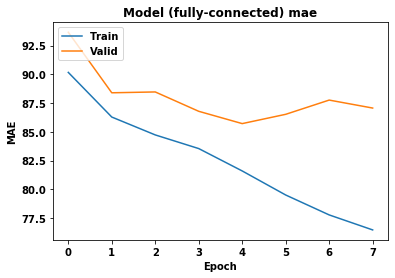

In [74]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model (fully-connected) mae')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show();

In [76]:
%load_ext tensorboard

In [78]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 12488), started 0:00:57 ago. (Use '!kill 12488' to kill it.)

In [79]:
scores = model.evaluate(normalized_X_test,y_test.values)

26717/26717 [==============================] - 3s 123us/sample - loss: 73440.7906 - mse: 73303.9922 - mae: 87.0626


In [80]:
predictions = model.predict(normalized_X_test)

In [63]:
predictions[1]

array([100.42376], dtype=float32)

In [64]:
y_test[1:2]

,price
20797,95.0


In [89]:
model.save('model.h5')